In [24]:
# DBSCAN clustering 
import numpy as np
from sklearn.cluster import  DBSCAN
from sklearn.metrics import confusion_matrix, f1_score, normalized_mutual_info_score, precision_score, recall_score
import pandas as pd
import timeit
import matplotlib.pyplot as plt
import csv
import os

In [71]:
# the method specifies key to make sure the ground truth set is in consistent order as the valeus accessed 
def ground_truth_set(key):
    ground_truth = []
    for item in key:
        if "Palm" in item: 
            ground_truth.append(1)
        else:
            ground_truth.append(0)
    
    return np.array(ground_truth)

def data_set(key, dict):
    data = []
    for item in key:
        data.append(dict[item])
    return np.array(data)

def get_truth_and_data(fileName):
    dict = np.load(fileName, allow_pickle=True).item()
    dict_keys = dict.keys()
    print(len(dict_keys))
    ground_truth = ground_truth_set(dict_keys)
    data_values = data_set(dict_keys, dict)

    return ground_truth, data_values

def accuracy(truth, pred):
    tn, fp, fn, tp = confusion_matrix(truth, pred, labels=[0,1]).ravel()
    return (tn+tp)/ (tn+ fp+ fn+ tp)

def three_d_accuracy(truth, pred):
    matrix1 = confusion_matrix(truth, pred, labels=[-1,0,1])
    
    trues1 = matrix1[0][0]+matrix1[1][1]+matrix1[2][2]
    accuracy_percent1 = trues1/len(truth)

    #see if swapped around is better 
    mapping = {-1:-1, 0: 1, 1: 0}
    # Reassign the labels using the mapping
    new_pred = np.array([mapping[label] for label in pred])

    matrix2 = confusion_matrix(truth, new_pred, labels=[-1,0,1])
    
    trues2 = matrix2[0][0]+matrix2[1][1]+matrix2[2][2]
    accuracy_percent2 = trues2/len(truth)

    if (accuracy_percent1 > accuracy_percent2):
        print(matrix1)
        # print("1. ", accuracy_percent1)
        return accuracy_percent1
    # print("2. ", accuracy_percent2)
    print(matrix2)
    return accuracy_percent2

def dbscan_labels(e, dataset):
    minpt = int(len(dataset)*0.025)
    print("chosen minpt is 0.1 of sample size ", minpt)
    print("the chosen eps: ", e)
    dbscan = DBSCAN(eps = e, min_samples=minpt)
    labels = dbscan.fit_predict(dataset)
    labels = np.array(labels)
    unique = np.unique(labels)
    result = np.sum(labels == -1)
    print("The unique labels are: ", unique)
    print("the amount of noisy samples are: ", result)
    return labels
from sklearn.neighbors import NearestNeighbors

def knn_plot(data):
    nn = int(len(data)*0.025)-1
    neighbors = NearestNeighbors(n_neighbors=nn)
    neighbors_fit = neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)

    distances = np.sort(distances[:, -1])  # Get the distances to the 4th nearest neighbor

    plt.plot(distances)
    plt.xlabel("Points sorted by distance")
    plt.ylabel("Distance to 4th nearest neighbor")
    plt.title("k-NN Distance Plot")
    plt.show()

def experiment(e, truth, data):
    labels = dbscan_labels(e, data)
    precision = precision_score(truth, labels, labels = [0,1], average = 'weighted')
    recall = recall_score(truth, labels, labels = [0,1], average = 'weighted')
    f1 = f1_score(truth, labels, labels = [0,1], average = 'weighted')
    return precision, recall, f1 

import csv 
def record_results(e, truth, data, dict, name, experi ="dbscan"): 
    precision, recall, f1 = experiment(e, truth,data)
    if name not in dict:
        dict[name] = [precision, recall, f1]

    if not os.path.exists(f"results_{experi}/{name}.csv"):
        with open(f"results_{experi}/{name}.csv", 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(("precision","recall", "f1"))
            writer.writerow((precision, recall, f1))
    else:
        with open(f"results_{experi}/{name}.csv", 'a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow((precision, recall, f1)) 
    
    print(name)
    if dict[name][0] <= precision:
        dict[name][0] = precision
    else:
        print("max precision: ", dict[name][0])

    if dict[name][1] <= recall:
        dict[name][1] = recall
    else:
        print("max recall: ", dict[name][0])

    if dict[name][2] <= f1:
        dict[name][2] = f1
    else:
        print("max f1 : ", dict[name][2])
    
    print("f1 : ", f1 , "\nprecision: ", precision,"\nrecall: ", recall)
    
def experiment_eps(title, eps_array, truth, dataset):
    print(title)
    for i in eps_array:
        labels = dbscan_labels(i, dataset)
        arr = np.array(labels)
        unique = np.unique(labels)
        result = np.sum(arr == -1)
        
        if(len(unique) == 3 or len(unique) == 2 or len(unique) == 4 or len(unique) == 5):
            f1 = f1_score(truth, labels, labels = [0,1], average = 'weighted')
            print("F1 score: ", f1)
            # print("accuracy: ", three_d_accuracy(truth, labels))
        print()

In [65]:
glcm_truth_n_pca_test, glcm_data_n_pca_test =  get_truth_and_data('GLCM_n_pca_test.npy')
glcm_truth_pca_test, glcm_data_pca_test =  get_truth_and_data('GLCM_pca_test.npy')

hist_truth_n_pca_test, hist_data_n_pca_test =  get_truth_and_data('hist_n_pca_test.npy')
hist_truth_pca_test, hist_data_pca_test =  get_truth_and_data('hist_pca_test.npy')

hog_truth_n_pca_test, hog_data_n_pca_test =  get_truth_and_data('hog_n_pca_test.npy')
hog_truth_pca_test, hog_data_pca_test =  get_truth_and_data('hog_pca_test.npy')

lbp_truth_n_pca_test, lbp_data_n_pca_test =  get_truth_and_data('lbp_n_pca_test.npy')
lbp_truth_pca_test, lbp_data_pca_test =  get_truth_and_data('lbp_pca_test.npy')

2669
2669
2669
2669
2669
2669
2669
2669


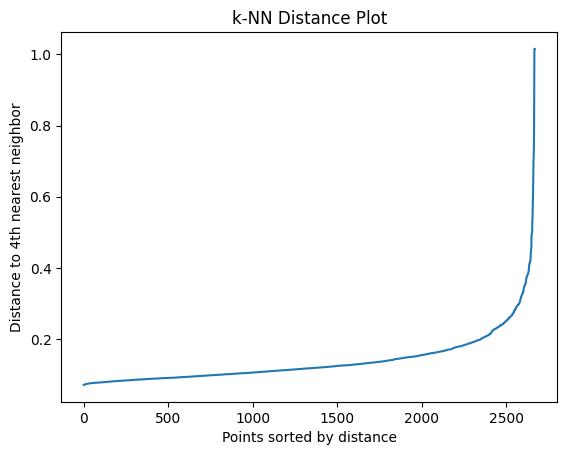

In [67]:
knn_plot(glcm_data_n_pca_test)

In [72]:
arr = np.linspace(0.07, 0.075, num=20)
experiment_eps("glcm normal data", arr, glcm_truth_n_pca_test, glcm_data_n_pca_test)

# chosen minpt is 0.1 of sample size  66
# the chosen eps:  0.07404702351175586
# The unique labels are:  [-1  0  1]
# the amount of noisy samples are:  2415
# F1 score:  0.10413639094253614

# chosen minpt is 0.1 of sample size  66
# the chosen eps:  0.07394736842105264
# The unique labels are:  [-1  0  1]
# the amount of noisy samples are:  2415
# F1 score:  0.10413639094253614

glcm normal data
chosen minpt is 0.1 of sample size  66
the chosen eps:  0.07
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  0.07026315789473685
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  0.07052631578947369
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  0.07078947368421053
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  0.07105263157894737
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  0.07131578947368422
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  0.07157894736842106
The unique labels are:  [-1]
the amount of noisy sam

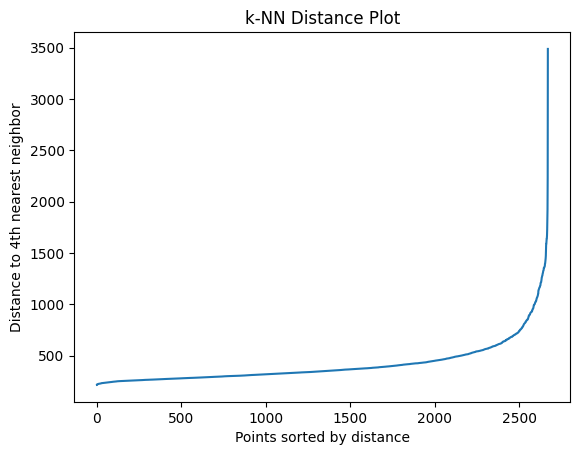

In [73]:
knn_plot(glcm_data_pca_test)

In [77]:
arr = np.linspace(262, 271, num=10)
experiment_eps("glcm data", arr, glcm_truth_pca_test, glcm_data_pca_test)

# chosen minpt is 0.1 of sample size  66
# the chosen eps:  268.15815815815813
# The unique labels are:  [-1  0  1  2]
# the amount of noisy samples are:  1483
# F1 score:  0.09059279278913049

# chosen minpt is 0.1 of sample size  66
# the chosen eps:  269.8198198198198
# The unique labels are:  [-1  0  1]
# the amount of noisy samples are:  1419
# F1 score:  0.09835012192322787

# chosen minpt is 0.1 of sample size  66
# the chosen eps:  271.48148148148147
# The unique labels are:  [-1  0  1]
# the amount of noisy samples are:  1406
# F1 score:  0.09519532475473286

# chosen minpt is 0.1 of sample size  66
# the chosen eps:  270.0
# The unique labels are:  [-1  0  1]
# the amount of noisy samples are:  1417
# F1 score:  0.09832787785740993


glcm data
chosen minpt is 0.1 of sample size  66
the chosen eps:  262.0
The unique labels are:  [-1  0  1  2  3]
the amount of noisy samples are:  1601
F1 score:  0.08273218125123527

chosen minpt is 0.1 of sample size  66
the chosen eps:  263.0
The unique labels are:  [-1  0  1  2]
the amount of noisy samples are:  1569
F1 score:  0.0832042651879045

chosen minpt is 0.1 of sample size  66
the chosen eps:  264.0
The unique labels are:  [-1  0  1  2]
the amount of noisy samples are:  1544
F1 score:  0.08449682206071359

chosen minpt is 0.1 of sample size  66
the chosen eps:  265.0
The unique labels are:  [-1  0  1  2]
the amount of noisy samples are:  1534
F1 score:  0.08443210947974976

chosen minpt is 0.1 of sample size  66
the chosen eps:  266.0
The unique labels are:  [-1  0  1  2]
the amount of noisy samples are:  1527
F1 score:  0.08584794689192035

chosen minpt is 0.1 of sample size  66
the chosen eps:  267.0
The unique labels are:  [-1  0  1  2]
the amount of noisy samples are: 

chosen minpt is 0.1 of sample size  66
the chosen eps:  253.2032032032032
The unique labels are:  [-1  0  1  2  3]
the amount of noisy samples are:  1917
F1 score:  0.2662025068913859


makes me think that perhaps the different campuses have an influence on the clustering 

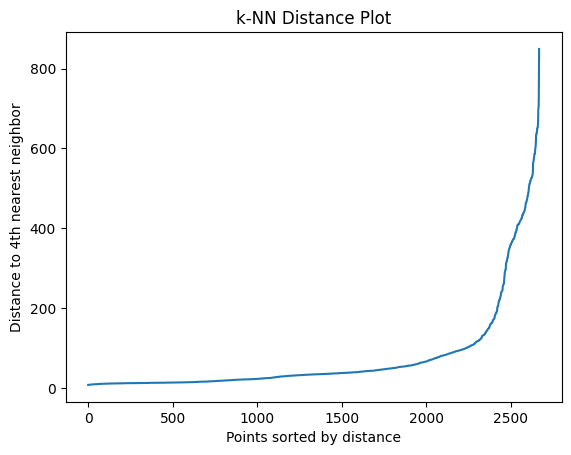

In [78]:
knn_plot(hist_data_n_pca_test)


In [81]:
arr = np.linspace(26, 315, num=290)
experiment_eps("hist normal data", arr, hist_truth_n_pca_test, hist_data_n_pca_test)


# chosen minpt is 0.1 of sample size  66
# the chosen eps:  78.0
# The unique labels are:  [-1  0  1]
# the amount of noisy samples are:  455
# F1 score:  0.6705644983585878



hist normal data
chosen minpt is 0.1 of sample size  66
the chosen eps:  26.0
The unique labels are:  [-1  0]
the amount of noisy samples are:  1415
F1 score:  0.007094805344879911

chosen minpt is 0.1 of sample size  66
the chosen eps:  27.0
The unique labels are:  [-1  0]
the amount of noisy samples are:  1406
F1 score:  0.0072079562624517155

chosen minpt is 0.1 of sample size  66
the chosen eps:  28.0
The unique labels are:  [-1  0]
the amount of noisy samples are:  1397
F1 score:  0.007319831840940054

chosen minpt is 0.1 of sample size  66
the chosen eps:  29.0
The unique labels are:  [-1  0]
the amount of noisy samples are:  1379
F1 score:  0.007389045421169789

chosen minpt is 0.1 of sample size  66
the chosen eps:  30.0
The unique labels are:  [-1  0]
the amount of noisy samples are:  1356
F1 score:  0.0072852920361350494

chosen minpt is 0.1 of sample size  66
the chosen eps:  31.0
The unique labels are:  [-1  0  1]
the amount of noisy samples are:  1193
F1 score:  0.10674905

chosen minpt is 0.1 of sample size  66
the chosen eps:  265.0
The unique labels are:  [-1  0  1  2]
the amount of noisy samples are:  180
F1 score:  0.6837195748293885


chosen minpt is 0.1 of sample size  66
the chosen eps:  287.0
The unique labels are:  [-1  0  1  2]
the amount of noisy samples are:  177
F1 score:  0.6837455473989177

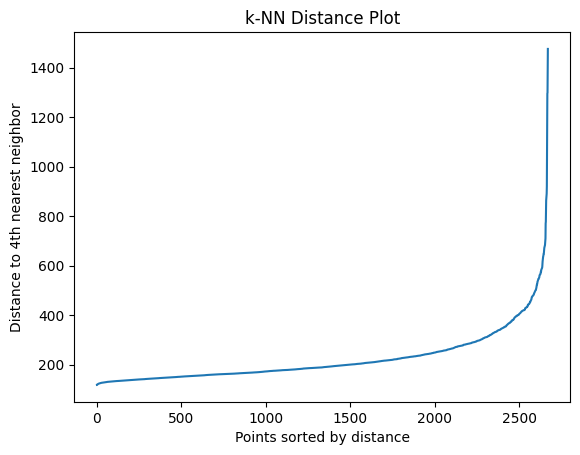

In [82]:
knn_plot(hist_data_pca_test)

In [86]:
arr = np.linspace(115, 890, num=776)
experiment_eps("hist data", arr, hist_truth_pca_test, hist_data_pca_test)

# chosen minpt is 0.1 of sample size  66
# the chosen eps:  461.0
# The unique labels are:  [-1  0]
# the amount of noisy samples are:  16
# F1 score:  0.02600561983080117

# results for this are inconclusive as no more than 1 cluster forms 

hist data
chosen minpt is 0.1 of sample size  66
the chosen eps:  115.0
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  116.0
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  117.0
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  118.0
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  119.0
The unique labels are:  [-1  0]
the amount of noisy samples are:  2603
F1 score:  0.0

chosen minpt is 0.1 of sample size  66
the chosen eps:  120.0
The unique labels are:  [-1  0]
the amount of noisy samples are:  2566
F1 score:  0.0

chosen minpt is 0.1 of sample size  66
the chosen eps:  121.0
The unique labels are:  [-1  0]
the amount of noisy samples are:  2550
F1 score:  0.0

chosen minpt is 0.1

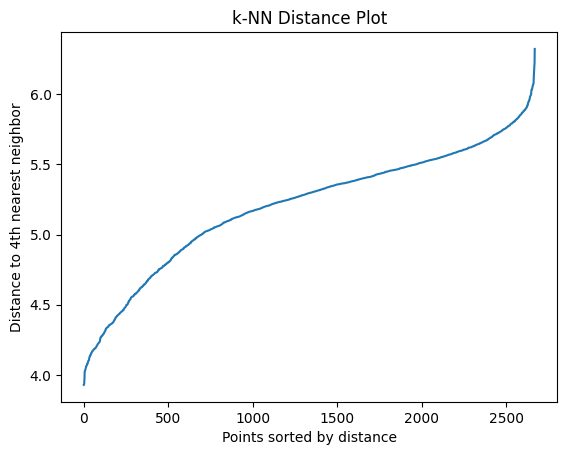

In [87]:
knn_plot(hog_data_n_pca_test)

In [91]:
arr = np.linspace(4.75, 5, num=26)
experiment_eps("hog n data", arr, hog_truth_n_pca_test, hog_data_n_pca_test)

# chosen minpt is 0.1 of sample size  66
# the chosen eps:  4.98
# The unique labels are:  [-1  0  1]
# the amount of noisy samples are:  926
# F1 score:  0.02774458322809082

# chosen minpt is 0.1 of sample size  66
# the chosen eps:  4.78
# The unique labels are:  [-1  0  1]
# the amount of noisy samples are:  1581
# F1 score:  0.0285036424251884


hog n data
chosen minpt is 0.1 of sample size  66
the chosen eps:  4.75


The unique labels are:  [-1  0]
the amount of noisy samples are:  1696
F1 score:  0.013508980874400538

chosen minpt is 0.1 of sample size  66
the chosen eps:  4.76
The unique labels are:  [-1  0]
the amount of noisy samples are:  1683
F1 score:  0.013375024542312661

chosen minpt is 0.1 of sample size  66
the chosen eps:  4.77
The unique labels are:  [-1  0]
the amount of noisy samples are:  1660
F1 score:  0.01332698206910033

chosen minpt is 0.1 of sample size  66
the chosen eps:  4.78
The unique labels are:  [-1  0  1]
the amount of noisy samples are:  1581
F1 score:  0.0285036424251884

chosen minpt is 0.1 of sample size  66
the chosen eps:  4.79
The unique labels are:  [-1  0  1]
the amount of noisy samples are:  1574
F1 score:  0.02843540864644201

chosen minpt is 0.1 of sample size  66
the chosen eps:  4.8
The unique labels are:  [-1  0  1  2]
the amount of noisy samples are:  1498
F1 score:  0.028339146706798744

chosen minpt is 0.1 of sample size  66
the chosen eps:  4.81
The

chosen minpt is 0.1 of sample size  66
the chosen eps:  4.96
The unique labels are:  [-1  0  1  2  3]
the amount of noisy samples are:  1013
F1 score:  0.12972889962951756

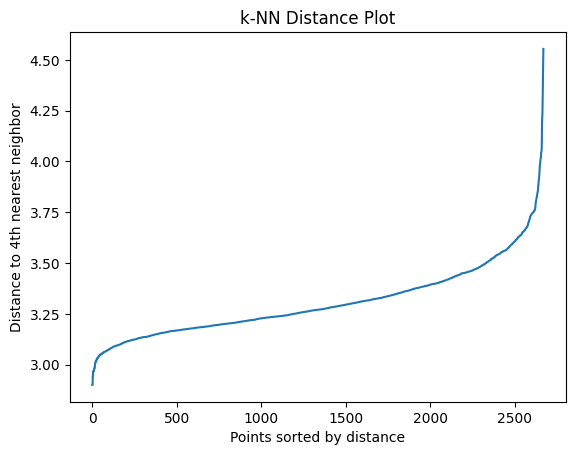

In [47]:
knn_plot(hog_data_pca_test)

In [95]:
arr = np.linspace(3.2, 3.3, num=100)
#arr = [3.55, 3.56, 3.57, 3.58]
experiment_eps("hog data", arr, hog_truth_pca_test, hog_data_pca_test)

# chosen minpt is 0.1 of sample size  66
# the chosen eps:  3.2424242424242427
# The unique labels are:  [-1  0  1]
# the amount of noisy samples are:  2373
# F1 score:  0.09346536375600231

# chosen minpt is 0.1 of sample size  66
# the chosen eps:  3.2434343434343433
# The unique labels are:  [-1  0  1]
# the amount of noisy samples are:  2373
# F1 score:  0.09346536375600231

# 0.09

hog data
chosen minpt is 0.1 of sample size  66
the chosen eps:  3.2
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  3.2010101010101013
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  3.202020202020202
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  3.203030303030303
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  3.2040404040404042
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  3.2050505050505054
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  3.206060606060606
The unique labels are:  [-1]
the amount of noisy samples are:  2669

c

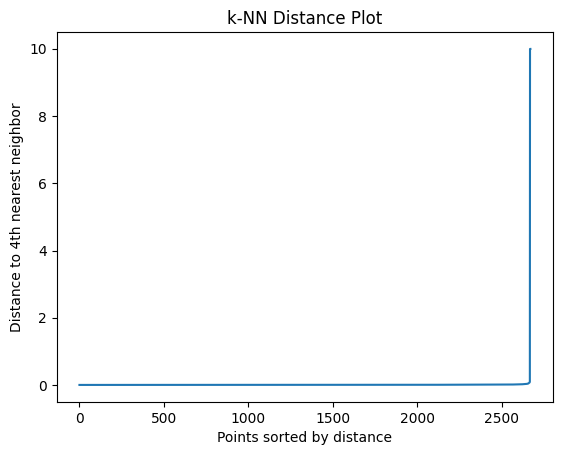

In [96]:
knn_plot(lbp_data_n_pca_test)

In [102]:
arr = np.linspace(6,15, num=1000)

experiment_eps("lbp data", arr, lbp_truth_n_pca_test, lbp_data_n_pca_test)

# chosen minpt is 0.1 of sample size  66
# the chosen eps:  0.6
# The unique labels are:  [-1  0]
# the amount of noisy samples are:  3
# F1 score:  0.02646255238802457
# inconclusive 
# 6

lbp data
chosen minpt is 0.1 of sample size  66
the chosen eps:  6.0
The unique labels are:  [-1  0]
the amount of noisy samples are:  3
F1 score:  0.02646255238802457

chosen minpt is 0.1 of sample size  66
the chosen eps:  6.009009009009009
The unique labels are:  [-1  0]
the amount of noisy samples are:  3
F1 score:  0.02646255238802457

chosen minpt is 0.1 of sample size  66
the chosen eps:  6.018018018018018
The unique labels are:  [-1  0]
the amount of noisy samples are:  3
F1 score:  0.02646255238802457

chosen minpt is 0.1 of sample size  66
the chosen eps:  6.027027027027027
The unique labels are:  [-1  0]
the amount of noisy samples are:  3
F1 score:  0.02646255238802457

chosen minpt is 0.1 of sample size  66
the chosen eps:  6.036036036036036
The unique labels are:  [-1  0]
the amount of noisy samples are:  3
F1 score:  0.02646255238802457

chosen minpt is 0.1 of sample size  66
the chosen eps:  6.045045045045045
The unique labels are:  [-1  0]
the amount of noisy samples a

KeyboardInterrupt: 

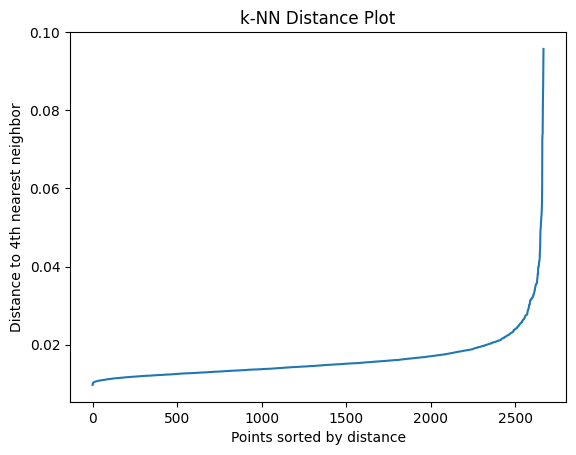

In [103]:
knn_plot(lbp_data_pca_test)

In [108]:
arr = np.linspace(0.001, 0.07, num=70)
experiment_eps("lbp data", arr, lbp_truth_pca_test, lbp_data_pca_test)

# lbp data
# chosen minpt is 0.1 of sample size  66
# the chosen eps:  0.01
# The unique labels are:  [-1  0  1]
# the amount of noisy samples are:  2525
# F1 score:  0.05038290304924796

#choosen 0.01785


lbp data
chosen minpt is 0.1 of sample size  66
the chosen eps:  0.001
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  0.002
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  0.003
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  0.004
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  0.005
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  0.006
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  0.007
The unique labels are:  [-1]
the amount of noisy samples are:  2669

chosen minpt is 0.1 of sample size  66
the chosen eps:  0.008
The unique l

In [113]:
# the PCA section 
glcm_truth_n_pca, glcm_data_n_pca =  get_truth_and_data('GLCM_n_pca.npy')
glcm_truth_pca, glcm_data_pca =  get_truth_and_data('GLCM_pca.npy')

hist_truth_n_pca, hist_data_n_pca =  get_truth_and_data('hist_n_pca.npy')
hist_truth_pca, hist_data_pca =  get_truth_and_data('hist_pca.npy')

hog_truth_n_pca, hog_data_n_pca =  get_truth_and_data('hog_n_pca.npy')
hog_truth_pca, hog_data_pca =  get_truth_and_data('hog_pca.npy')

lbp_truth_n_pca, lbp_data_n_pca =  get_truth_and_data('lbp_n_pca.npy')
lbp_truth_pca, lbp_data_pca =  get_truth_and_data('lbp_pca.npy')

13067
13067
13067
13067
13067
13067
13067
13067


In [111]:
p_r_f1 = {}

In [115]:
for i in range (9):
    record_results(0.074, glcm_truth_n_pca, glcm_data_n_pca,  p_r_f1,   "glcm_n_pca" )
    record_results(270, glcm_truth_pca, glcm_data_pca,  p_r_f1,   "glcm_pca" )

    record_results(78, hist_truth_n_pca, hist_data_n_pca,  p_r_f1,   "hist_n_pca" )
    record_results(461, hist_truth_pca, hist_data_pca,  p_r_f1,   "hist_pca" ) # inconclusive for this 

    record_results(4.78, hog_truth_n_pca, hog_data_n_pca,  p_r_f1,   "hog_n_pca" )
    record_results(3.243, hog_truth_pca, hog_data_pca,  p_r_f1,   "hog_pca" )

    record_results(6 ,lbp_truth_n_pca, lbp_data_n_pca,  p_r_f1, "lbp_n_pca") # inconclusive 
    record_results(0.01, lbp_truth_pca, lbp_data_pca,  p_r_f1,   "lbp_pca" )

chosen minpt is 0.1 of sample size  326
the chosen eps:  0.074
The unique labels are:  [-1  0]
the amount of noisy samples are:  12741
glcm_n_pca
f1 :  0.00026168304036985624 
precision:  0.0009014418844642594 
recall:  0.0001530573199663274
chosen minpt is 0.1 of sample size  326
the chosen eps:  270


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0  1]
the amount of noisy samples are:  10377
glcm_pca
f1 :  0.049585139288612114 
precision:  0.558771872293095 
recall:  0.029846177393433843
chosen minpt is 0.1 of sample size  326
the chosen eps:  78
The unique labels are:  [-1  0  1  2]
the amount of noisy samples are:  2083
hist_n_pca
f1 :  0.671346585906957 
precision:  0.8341195560913058 
recall:  0.5692967016147547
chosen minpt is 0.1 of sample size  326
the chosen eps:  461
The unique labels are:  [-1  0]
the amount of noisy samples are:  122
hist_pca
f1 :  0.03615797708572839 
precision:  0.020760460771701527 
recall:  0.1399709191092064
chosen minpt is 0.1 of sample size  326
the chosen eps:  4.78


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0  1]
the amount of noisy samples are:  6150
hog_n_pca
f1 :  0.06064979679835916 
precision:  0.42053624708507314 
recall:  0.058774010867069716
chosen minpt is 0.1 of sample size  326
the chosen eps:  3.243
The unique labels are:  [-1  0]
the amount of noisy samples are:  9128
hog_pca
f1 :  0.0007523554898498428 
precision:  0.0005595393266095746 
recall:  0.0011479298997474554
chosen minpt is 0.1 of sample size  326
the chosen eps:  6


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [0]
the amount of noisy samples are:  0
lbp_n_pca
f1 :  0.037647995217446405 
precision:  0.02158990220876518 
recall:  0.1469350271676743
chosen minpt is 0.1 of sample size  326
the chosen eps:  0.01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1]
the amount of noisy samples are:  13067
lbp_pca
f1 :  0.0 
precision:  0.0 
recall:  0.0
chosen minpt is 0.1 of sample size  326
the chosen eps:  0.074


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0]
the amount of noisy samples are:  12741
glcm_n_pca
f1 :  0.00026168304036985624 
precision:  0.0009014418844642594 
recall:  0.0001530573199663274
chosen minpt is 0.1 of sample size  326
the chosen eps:  270


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0  1]
the amount of noisy samples are:  10377
glcm_pca
f1 :  0.049585139288612114 
precision:  0.558771872293095 
recall:  0.029846177393433843
chosen minpt is 0.1 of sample size  326
the chosen eps:  78
The unique labels are:  [-1  0  1  2]
the amount of noisy samples are:  2083
hist_n_pca
f1 :  0.671346585906957 
precision:  0.8341195560913058 
recall:  0.5692967016147547
chosen minpt is 0.1 of sample size  326
the chosen eps:  461
The unique labels are:  [-1  0]
the amount of noisy samples are:  122
hist_pca
f1 :  0.03615797708572839 
precision:  0.020760460771701527 
recall:  0.1399709191092064
chosen minpt is 0.1 of sample size  326
the chosen eps:  4.78


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0  1]
the amount of noisy samples are:  6150
hog_n_pca
f1 :  0.06064979679835916 
precision:  0.42053624708507314 
recall:  0.058774010867069716
chosen minpt is 0.1 of sample size  326
the chosen eps:  3.243
The unique labels are:  [-1  0]
the amount of noisy samples are:  9128
hog_pca
f1 :  0.0007523554898498428 
precision:  0.0005595393266095746 
recall:  0.0011479298997474554
chosen minpt is 0.1 of sample size  326
the chosen eps:  6


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [0]
the amount of noisy samples are:  0
lbp_n_pca
f1 :  0.037647995217446405 
precision:  0.02158990220876518 
recall:  0.1469350271676743
chosen minpt is 0.1 of sample size  326
the chosen eps:  0.01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1]
the amount of noisy samples are:  13067
lbp_pca
f1 :  0.0 
precision:  0.0 
recall:  0.0
chosen minpt is 0.1 of sample size  326
the chosen eps:  0.074


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0]
the amount of noisy samples are:  12741
glcm_n_pca
f1 :  0.00026168304036985624 
precision:  0.0009014418844642594 
recall:  0.0001530573199663274
chosen minpt is 0.1 of sample size  326
the chosen eps:  270


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0  1]
the amount of noisy samples are:  10377
glcm_pca
f1 :  0.049585139288612114 
precision:  0.558771872293095 
recall:  0.029846177393433843
chosen minpt is 0.1 of sample size  326
the chosen eps:  78
The unique labels are:  [-1  0  1  2]
the amount of noisy samples are:  2083
hist_n_pca
f1 :  0.671346585906957 
precision:  0.8341195560913058 
recall:  0.5692967016147547
chosen minpt is 0.1 of sample size  326
the chosen eps:  461
The unique labels are:  [-1  0]
the amount of noisy samples are:  122
hist_pca
f1 :  0.03615797708572839 
precision:  0.020760460771701527 
recall:  0.1399709191092064
chosen minpt is 0.1 of sample size  326
the chosen eps:  4.78


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0  1]
the amount of noisy samples are:  6150
hog_n_pca
f1 :  0.06064979679835916 
precision:  0.42053624708507314 
recall:  0.058774010867069716
chosen minpt is 0.1 of sample size  326
the chosen eps:  3.243
The unique labels are:  [-1  0]
the amount of noisy samples are:  9128
hog_pca
f1 :  0.0007523554898498428 
precision:  0.0005595393266095746 
recall:  0.0011479298997474554
chosen minpt is 0.1 of sample size  326
the chosen eps:  6


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [0]
the amount of noisy samples are:  0
lbp_n_pca
f1 :  0.037647995217446405 
precision:  0.02158990220876518 
recall:  0.1469350271676743
chosen minpt is 0.1 of sample size  326
the chosen eps:  0.01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1]
the amount of noisy samples are:  13067
lbp_pca
f1 :  0.0 
precision:  0.0 
recall:  0.0
chosen minpt is 0.1 of sample size  326
the chosen eps:  0.074


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0]
the amount of noisy samples are:  12741
glcm_n_pca
f1 :  0.00026168304036985624 
precision:  0.0009014418844642594 
recall:  0.0001530573199663274
chosen minpt is 0.1 of sample size  326
the chosen eps:  270


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0  1]
the amount of noisy samples are:  10377
glcm_pca
f1 :  0.049585139288612114 
precision:  0.558771872293095 
recall:  0.029846177393433843
chosen minpt is 0.1 of sample size  326
the chosen eps:  78
The unique labels are:  [-1  0  1  2]
the amount of noisy samples are:  2083
hist_n_pca
f1 :  0.671346585906957 
precision:  0.8341195560913058 
recall:  0.5692967016147547
chosen minpt is 0.1 of sample size  326
the chosen eps:  461
The unique labels are:  [-1  0]
the amount of noisy samples are:  122
hist_pca
f1 :  0.03615797708572839 
precision:  0.020760460771701527 
recall:  0.1399709191092064
chosen minpt is 0.1 of sample size  326
the chosen eps:  4.78


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0  1]
the amount of noisy samples are:  6150
hog_n_pca
f1 :  0.06064979679835916 
precision:  0.42053624708507314 
recall:  0.058774010867069716
chosen minpt is 0.1 of sample size  326
the chosen eps:  3.243
The unique labels are:  [-1  0]
the amount of noisy samples are:  9128
hog_pca
f1 :  0.0007523554898498428 
precision:  0.0005595393266095746 
recall:  0.0011479298997474554
chosen minpt is 0.1 of sample size  326
the chosen eps:  6


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [0]
the amount of noisy samples are:  0
lbp_n_pca
f1 :  0.037647995217446405 
precision:  0.02158990220876518 
recall:  0.1469350271676743
chosen minpt is 0.1 of sample size  326
the chosen eps:  0.01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1]
the amount of noisy samples are:  13067
lbp_pca
f1 :  0.0 
precision:  0.0 
recall:  0.0
chosen minpt is 0.1 of sample size  326
the chosen eps:  0.074


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0]
the amount of noisy samples are:  12741
glcm_n_pca
f1 :  0.00026168304036985624 
precision:  0.0009014418844642594 
recall:  0.0001530573199663274
chosen minpt is 0.1 of sample size  326
the chosen eps:  270
The unique labels are:  [-1  0  1]
the amount of noisy samples are:  10377


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


glcm_pca
f1 :  0.049585139288612114 
precision:  0.558771872293095 
recall:  0.029846177393433843
chosen minpt is 0.1 of sample size  326
the chosen eps:  78
The unique labels are:  [-1  0  1  2]
the amount of noisy samples are:  2083
hist_n_pca
f1 :  0.671346585906957 
precision:  0.8341195560913058 
recall:  0.5692967016147547
chosen minpt is 0.1 of sample size  326
the chosen eps:  461
The unique labels are:  [-1  0]
the amount of noisy samples are:  122
hist_pca
f1 :  0.03615797708572839 
precision:  0.020760460771701527 
recall:  0.1399709191092064
chosen minpt is 0.1 of sample size  326
the chosen eps:  4.78


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0  1]
the amount of noisy samples are:  6150
hog_n_pca
f1 :  0.06064979679835916 
precision:  0.42053624708507314 
recall:  0.058774010867069716
chosen minpt is 0.1 of sample size  326
the chosen eps:  3.243
The unique labels are:  [-1  0]
the amount of noisy samples are:  9128
hog_pca
f1 :  0.0007523554898498428 
precision:  0.0005595393266095746 
recall:  0.0011479298997474554
chosen minpt is 0.1 of sample size  326
the chosen eps:  6


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [0]
the amount of noisy samples are:  0
lbp_n_pca
f1 :  0.037647995217446405 
precision:  0.02158990220876518 
recall:  0.1469350271676743
chosen minpt is 0.1 of sample size  326
the chosen eps:  0.01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1]
the amount of noisy samples are:  13067
lbp_pca
f1 :  0.0 
precision:  0.0 
recall:  0.0
chosen minpt is 0.1 of sample size  326
the chosen eps:  0.074


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0]
the amount of noisy samples are:  12741
glcm_n_pca
f1 :  0.00026168304036985624 
precision:  0.0009014418844642594 
recall:  0.0001530573199663274
chosen minpt is 0.1 of sample size  326
the chosen eps:  270


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0  1]
the amount of noisy samples are:  10377
glcm_pca
f1 :  0.049585139288612114 
precision:  0.558771872293095 
recall:  0.029846177393433843
chosen minpt is 0.1 of sample size  326
the chosen eps:  78
The unique labels are:  [-1  0  1  2]
the amount of noisy samples are:  2083
hist_n_pca
f1 :  0.671346585906957 
precision:  0.8341195560913058 
recall:  0.5692967016147547
chosen minpt is 0.1 of sample size  326
the chosen eps:  461
The unique labels are:  [-1  0]
the amount of noisy samples are:  122
hist_pca
f1 :  0.03615797708572839 
precision:  0.020760460771701527 
recall:  0.1399709191092064
chosen minpt is 0.1 of sample size  326
the chosen eps:  4.78


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0  1]
the amount of noisy samples are:  6150
hog_n_pca
f1 :  0.06064979679835916 
precision:  0.42053624708507314 
recall:  0.058774010867069716
chosen minpt is 0.1 of sample size  326
the chosen eps:  3.243
The unique labels are:  [-1  0]
the amount of noisy samples are:  9128
hog_pca
f1 :  0.0007523554898498428 
precision:  0.0005595393266095746 
recall:  0.0011479298997474554
chosen minpt is 0.1 of sample size  326
the chosen eps:  6


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [0]
the amount of noisy samples are:  0
lbp_n_pca
f1 :  0.037647995217446405 
precision:  0.02158990220876518 
recall:  0.1469350271676743
chosen minpt is 0.1 of sample size  326
the chosen eps:  0.01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1]
the amount of noisy samples are:  13067
lbp_pca
f1 :  0.0 
precision:  0.0 
recall:  0.0
chosen minpt is 0.1 of sample size  326
the chosen eps:  0.074


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0]
the amount of noisy samples are:  12741
glcm_n_pca
f1 :  0.00026168304036985624 
precision:  0.0009014418844642594 
recall:  0.0001530573199663274
chosen minpt is 0.1 of sample size  326
the chosen eps:  270


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0  1]
the amount of noisy samples are:  10377
glcm_pca
f1 :  0.049585139288612114 
precision:  0.558771872293095 
recall:  0.029846177393433843
chosen minpt is 0.1 of sample size  326
the chosen eps:  78
The unique labels are:  [-1  0  1  2]
the amount of noisy samples are:  2083
hist_n_pca
f1 :  0.671346585906957 
precision:  0.8341195560913058 
recall:  0.5692967016147547
chosen minpt is 0.1 of sample size  326
the chosen eps:  461
The unique labels are:  [-1  0]
the amount of noisy samples are:  122
hist_pca
f1 :  0.03615797708572839 
precision:  0.020760460771701527 
recall:  0.1399709191092064
chosen minpt is 0.1 of sample size  326
the chosen eps:  4.78


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0  1]
the amount of noisy samples are:  6150
hog_n_pca
f1 :  0.06064979679835916 
precision:  0.42053624708507314 
recall:  0.058774010867069716
chosen minpt is 0.1 of sample size  326
the chosen eps:  3.243
The unique labels are:  [-1  0]
the amount of noisy samples are:  9128
hog_pca
f1 :  0.0007523554898498428 
precision:  0.0005595393266095746 
recall:  0.0011479298997474554
chosen minpt is 0.1 of sample size  326
the chosen eps:  6


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [0]
the amount of noisy samples are:  0
lbp_n_pca
f1 :  0.037647995217446405 
precision:  0.02158990220876518 
recall:  0.1469350271676743
chosen minpt is 0.1 of sample size  326
the chosen eps:  0.01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1]
the amount of noisy samples are:  13067
lbp_pca
f1 :  0.0 
precision:  0.0 
recall:  0.0
chosen minpt is 0.1 of sample size  326
the chosen eps:  0.074


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0]
the amount of noisy samples are:  12741
glcm_n_pca
f1 :  0.00026168304036985624 
precision:  0.0009014418844642594 
recall:  0.0001530573199663274
chosen minpt is 0.1 of sample size  326
the chosen eps:  270


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0  1]
the amount of noisy samples are:  10377
glcm_pca
f1 :  0.049585139288612114 
precision:  0.558771872293095 
recall:  0.029846177393433843
chosen minpt is 0.1 of sample size  326
the chosen eps:  78
The unique labels are:  [-1  0  1  2]
the amount of noisy samples are:  2083
hist_n_pca
f1 :  0.671346585906957 
precision:  0.8341195560913058 
recall:  0.5692967016147547
chosen minpt is 0.1 of sample size  326
the chosen eps:  461
The unique labels are:  [-1  0]
the amount of noisy samples are:  122
hist_pca
f1 :  0.03615797708572839 
precision:  0.020760460771701527 
recall:  0.1399709191092064
chosen minpt is 0.1 of sample size  326
the chosen eps:  4.78


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0  1]
the amount of noisy samples are:  6150
hog_n_pca
f1 :  0.06064979679835916 
precision:  0.42053624708507314 
recall:  0.058774010867069716
chosen minpt is 0.1 of sample size  326
the chosen eps:  3.243
The unique labels are:  [-1  0]
the amount of noisy samples are:  9128
hog_pca
f1 :  0.0007523554898498428 
precision:  0.0005595393266095746 
recall:  0.0011479298997474554
chosen minpt is 0.1 of sample size  326
the chosen eps:  6


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [0]
the amount of noisy samples are:  0
lbp_n_pca
f1 :  0.037647995217446405 
precision:  0.02158990220876518 
recall:  0.1469350271676743
chosen minpt is 0.1 of sample size  326
the chosen eps:  0.01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1]
the amount of noisy samples are:  13067
lbp_pca
f1 :  0.0 
precision:  0.0 
recall:  0.0
chosen minpt is 0.1 of sample size  326
the chosen eps:  0.074


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0]
the amount of noisy samples are:  12741
glcm_n_pca
f1 :  0.00026168304036985624 
precision:  0.0009014418844642594 
recall:  0.0001530573199663274
chosen minpt is 0.1 of sample size  326
the chosen eps:  270


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0  1]
the amount of noisy samples are:  10377
glcm_pca
f1 :  0.049585139288612114 
precision:  0.558771872293095 
recall:  0.029846177393433843
chosen minpt is 0.1 of sample size  326
the chosen eps:  78
The unique labels are:  [-1  0  1  2]
the amount of noisy samples are:  2083
hist_n_pca
f1 :  0.671346585906957 
precision:  0.8341195560913058 
recall:  0.5692967016147547
chosen minpt is 0.1 of sample size  326
the chosen eps:  461
The unique labels are:  [-1  0]
the amount of noisy samples are:  122
hist_pca
f1 :  0.03615797708572839 
precision:  0.020760460771701527 
recall:  0.1399709191092064
chosen minpt is 0.1 of sample size  326
the chosen eps:  4.78


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1  0  1]
the amount of noisy samples are:  6150
hog_n_pca
f1 :  0.06064979679835916 
precision:  0.42053624708507314 
recall:  0.058774010867069716
chosen minpt is 0.1 of sample size  326
the chosen eps:  3.243
The unique labels are:  [-1  0]
the amount of noisy samples are:  9128
hog_pca
f1 :  0.0007523554898498428 
precision:  0.0005595393266095746 
recall:  0.0011479298997474554
chosen minpt is 0.1 of sample size  326
the chosen eps:  6


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [0]
the amount of noisy samples are:  0
lbp_n_pca
f1 :  0.037647995217446405 
precision:  0.02158990220876518 
recall:  0.1469350271676743
chosen minpt is 0.1 of sample size  326
the chosen eps:  0.01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The unique labels are:  [-1]
the amount of noisy samples are:  13067
lbp_pca
f1 :  0.0 
precision:  0.0 
recall:  0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
# when sample was set to 3 

record_results(0.33, glcm_truth_n_pca, glcm_data_n_pca,  p_r_f1,   "glcm_n" )
record_results(480, glcm_truth_pca, glcm_data_pca,  p_r_f1,   "glcm" )
record_results(180, hist_truth_n_pca, hist_data_n_pca,  p_r_f1,   "hist_n" )
record_results(280, hist_truth_pca, hist_data_pca,  p_r_f1,   "hist" )

record_results(5.033, hog_truth_n_pca, hog_data_n_pca,  p_r_f1,   "hog_n" )
record_results(3.57, hog_truth_pca, hog_data_pca,  p_r_f1,   "hog" )

#record_results(  ,lbp_truth_n_pca, lbp_data_n_pca,  p_r_f1, "lbp_n_pca")
record_results(0.01785, lbp_truth_pca, lbp_data_pca,  p_r_f1,   "lbp" )

glcm_n
f1 :  0.040567207796324244 
precision:  0.8746687583522643 
recall:  0.14823601438738807


at min sample of 3


glcm_n
f1 :  0.040567207796324244 
precision:  0.8746687583522643 
recall:  0.14823601438738807


glcm
f1 :  0.03785961799435621 
precision:  0.8745252350829662 
recall:  0.1456340399479605


hist_n
f1 :  0.037647995217446405 
precision:  0.02158990220876518 
recall:  0.1469350271676743
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


hist
f1 :  0.03732794525721038 
precision:  0.5899559161743317 
recall:  0.1439504094283309

hog_n
f1 :  0.035603995110226425 
precision:  0.020525707436842223 
recall:  0.13415474095048596
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


hog
f1 :  0.03290357501305513 
precision:  0.019005339003094493 
recall:  0.12244585597306192


lbp
f1 :  0.03706204445867489 
precision:  0.5898159177581467 
recall:  0.14234330756868446
